## Mount to Google Drive Folder
To access the dataset and relevant code, we mount our current directory to the desired folder. In this case, it's the project folder "Contrast-GMMs" in which I've backed uo the dataset files. I've placed a shortcut for this folder in my "Projects" folder. 


In [1]:
'''
# This mounts your Google Drive to the Colab VM.
# ------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')
# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import os
import sys
%cd 'drive/My Drive/Projects/Contrast-GMMs'
'''

"\n# This mounts your Google Drive to the Colab VM.\n# ------------------------------------------------\nfrom google.colab import drive\ndrive.mount('/content/drive')\n# Now that we've mounted your Drive, this ensures that\n# the Python interpreter of the Colab VM can load\n# python files from within it.\nimport os\nimport sys\n%cd 'drive/My Drive/Projects/Contrast-GMMs'\n"

# Import Necessary Libraries 
The following imports are necessary to run the subsequent code

In [2]:
# Imports for our code
# -----------------------------------
from model.NovelNetwork import NovelNetwork
from model.layers.SupConLoss import SupConLoss
from model.layers.MVNet import MV_CNN
import data.utils

# inmports for external libraries
# -----------------------------------
import torch
from collections import OrderedDict

# Model Training with Hyperparameters 


In [3]:
# CONSTANTS
# ---------------------------
BATCH_SIZE = 64
KKC = ["airplane", "toilet", "guitar", "bed"]  # Classes seen during training and test time (KKC)
UUC = ["car"]                           # Classes not seen during training time (UUC)
ALL_CLASSES = KKC + UUC                 # All classes
PERC_VAL = 0.20                         # Percent of data for validation 

LATENT_DIMS=3                           # Size of the Latent-Space (Representation is LATENT_DIM x 1)
# ---------------------------

# hyperparameters for our model
args = {
    'print_every' : 100,
    'feat_layer'  : 'fc',
    'dist_metric' : 'mahalanobis',
    'epoch' : 5,
    'lr' : 5e-4
}

# Set the device (CUDA compatibility needs to be added to NovelNetwork.py)
USE_GPU = True
dtype = torch.float32 # we will be using float throughout this tutorial
if USE_GPU:
  device = torch.device('mps')
else:
  device = torch.device('cpu')


['./data/modelnet40v2png/lamp', './data/modelnet40v2png/wardrobe', './data/modelnet40v2png/bench', './data/modelnet40v2png/piano', './data/modelnet40v2png/car', './data/modelnet40v2png/bed', './data/modelnet40v2png/monitor', './data/modelnet40v2png/cup', './data/modelnet40v2png/radio', './data/modelnet40v2png/mantel', './data/modelnet40v2png/desk', './data/modelnet40v2png/plant', './data/modelnet40v2png/xbox', './data/modelnet40v2png/curtain', './data/modelnet40v2png/person', './data/modelnet40v2png/stool', './data/modelnet40v2png/range_hood', './data/modelnet40v2png/guitar', './data/modelnet40v2png/chair', './data/modelnet40v2png/sink', './data/modelnet40v2png/bookshelf', './data/modelnet40v2png/dresser', './data/modelnet40v2png/cone', './data/modelnet40v2png/vase', './data/modelnet40v2png/glass_box', './data/modelnet40v2png/tent', './data/modelnet40v2png/toilet', './data/modelnet40v2png/sofa', './data/modelnet40v2png/bowl', './data/modelnet40v2png/table', './data/modelnet40v2png/flo

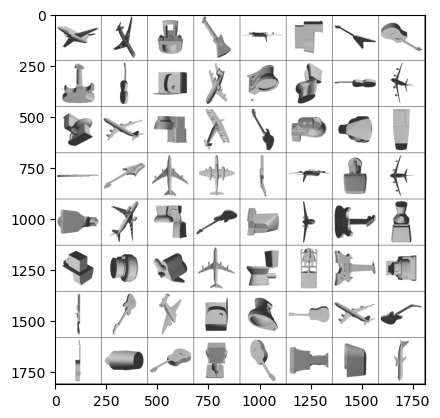

   0  1  2  3  4  5  6  7
0  0  0  1  2  0  1  2  2
1  2  2  1  0  1  1  2  0
2  1  0  1  0  2  1  1  1
3  2  2  0  0  2  0  1  0
4  1  0  1  2  1  0  2  1
5  1  1  1  0  1  1  2  1
6  2  2  0  1  1  2  0  2
7  2  1  2  1  2  1  1  0


In [4]:
# COLLECTING DATASET
# ---------------------------

print("Collecting ModelNet data . . .\n")
MODELNET = data.utils.get_ModelNet(KKC=KKC, ALL=ALL_CLASSES, BATCH_SIZE=BATCH_SIZE)
print(". . . done!")

# Show examples from MNIST
data.utils.showImg2d(MODELNET['TRAIN'])
# Define the layers
layers = MV_CNN(LATENT_DIMS)

Using device:  mps
Iteration 0, loss = 5.1218

Iteration 100, loss = 4.8219

Iteration 200, loss = 4.5266

torch.Size([1, 224, 224])


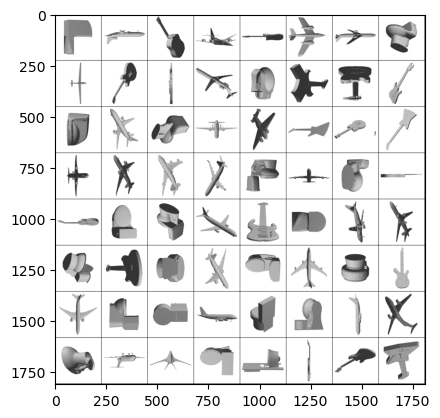

   0  1  2  3  4  5  6  7
0  1  0  2  0  2  0  0  1
1  0  2  2  0  1  2  2  2
2  1  0  1  0  0  2  2  2
3  0  0  0  0  1  0  1  2
4  2  1  1  0  2  1  0  0
5  1  2  1  0  1  0  1  2
6  0  1  1  0  1  1  0  0
7  1  0  0  1  1  2  2  2


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 64 and the array at index 1 has size 3

In [5]:
# Run the model
# ------------------------------------------------
new_model = NovelNetwork(layers, KKC, criterion=SupConLoss)
new_model.train(MODELNET['TRAIN'], MODELNET['VAL'], args, print_info=True)
# ------------------------------------------------